In [1]:
from glob import glob
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
results={}
for i in glob('function-calc-test/lin5qubits/*/*results.json'):

    with open(i,'r') as f:
        results[os.path.basename(os.path.dirname(i))]=json.load(f)

In [11]:
r2_df=pd.DataFrame.from_dict(results).T[['R2_train','R2_test']].sort_index()

In [12]:
r2_df

,R2_train,R2_test
A1-A1-CNOT_ESU2,-0.292522,0.060054
A1-A1-CNOT_Efficient-CRX,0.063792,-0.019844
A1-A1-CNOT_Efficient-CRZ,0.063792,-0.019844
A1-A1-CNOT_Full-CRX,0.063792,-0.019844
A1-A1-CNOT_Full-CRZ,0.063792,-0.019844
A1-A1-CNOT_Full-Pauli-CRX,0.320989,0.167567
A1-A1-CNOT_Full-Pauli-CRZ,0.320989,0.167561
A1-A1-CNOT_HWE-CNOT,0.868221,0.737441
A1-A1-CNOT_HWE-CZ,0.106414,-0.129832
A1-A1-CNOT_Hadamard,-0.000501,-0.180641


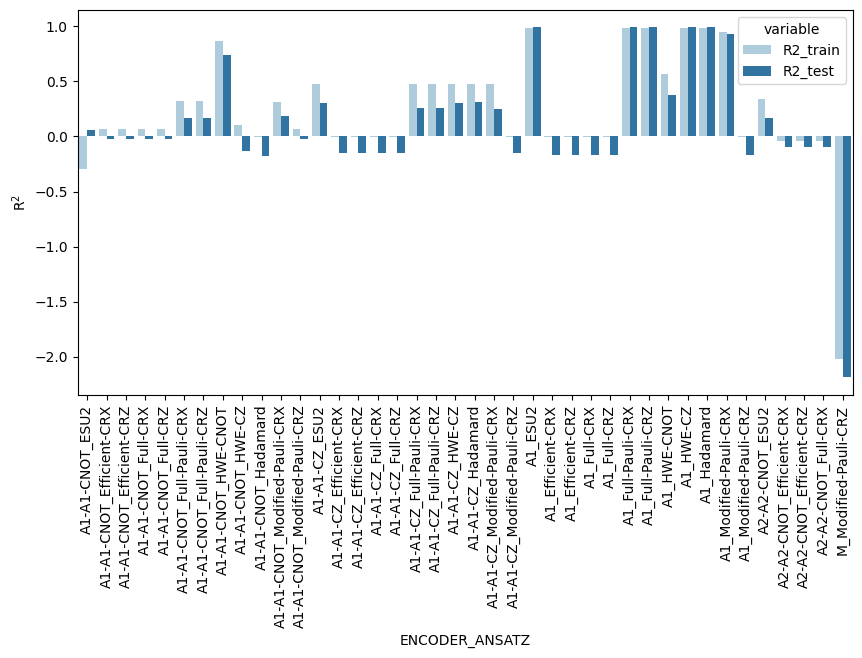

In [13]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
ax=sns.barplot(data=r2_df.reset_index().melt(id_vars='index'),x='index',y='value',hue='variable',palette=sns.color_palette("Paired",2))
ax.tick_params(axis='x', labelrotation=90)
plt.ylabel('R$^{2}$')
plt.xlabel('ENCODER_ANSATZ')
plt.show()

In [6]:
preddf=pd.read_csv("./function-calc-test/lin5qubits/A1_Full-Pauli-CRX/A1_Full-Pauli-CRX_predicted_values.csv")
preddf['Predicted']=[float(i.strip('[]')) for i in preddf['Predicted'].values]
preddf['Reference']=[float(i.strip('[]')) for i in preddf['Reference'].values]

<Axes: xlabel='Predicted', ylabel='Reference'>

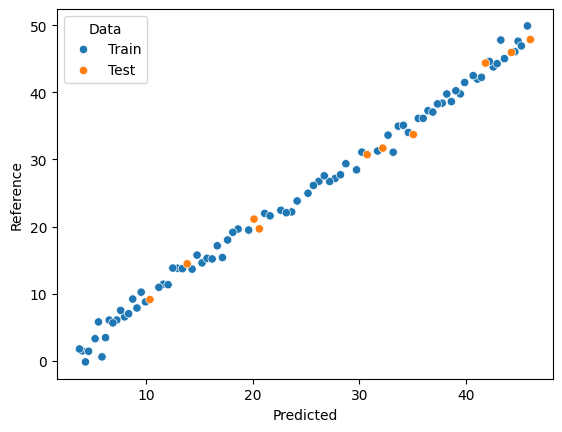

In [7]:
sns.scatterplot(data=preddf,x='Predicted',y='Reference', hue='Data')

In [8]:
r2_df.sort_values(by='R2_train',ascending=False)

,R2_train,R2_test
A1_Full-Pauli-CRX,0.98859,0.989194
A1_Full-Pauli-CRZ,0.98859,0.989218
A1_HWE-CZ,0.98859,0.989218
A1_ESU2,0.98859,0.989218
A1_Hadamard,0.988522,0.989435
A1_Modified-Pauli-CRX,0.946709,0.930858
A1-A1-CNOT_HWE-CNOT,0.868221,0.737441
A1_HWE-CNOT,0.570966,0.380047
A1-A1-CZ_Modified-Pauli-CRX,0.479198,0.252886
A1-A1-CZ_Full-Pauli-CRX,0.479167,0.254117
